

# Project: Investigating TMDB movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction



In [1]:
"""
in this project, we are going to explore the tmdb movie dataset, clean the dataset, and come up with questions and try to 
use the dataset as well as some python packages to conclude the answers for these questions
"""

'\nin this project, we are going to explore the tmdb movie dataset, clean the dataset, and come up with questions and try to \nuse the dataset as well as some python packages to conclude the answers for these questions\n'

In [2]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
#loading the data 
df = pd.read_csv('tmdb-movies.csv')

In [4]:
#showing the first 5 rows of the data 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
df.shape

(10866, 21)

In [8]:
#double checking for the data type to know what the object datatypes in the (df.info()) table are 
for i in range(df.shape[1]):
    print("the datatype of the ",df.columns[i], " column is ", type(df[df.columns[i]][0]))

the datatype of the  id  column is  <class 'numpy.int64'>
the datatype of the  imdb_id  column is  <class 'str'>
the datatype of the  popularity  column is  <class 'numpy.float64'>
the datatype of the  budget  column is  <class 'numpy.int64'>
the datatype of the  revenue  column is  <class 'numpy.int64'>
the datatype of the  original_title  column is  <class 'str'>
the datatype of the  cast  column is  <class 'str'>
the datatype of the  homepage  column is  <class 'str'>
the datatype of the  director  column is  <class 'str'>
the datatype of the  tagline  column is  <class 'str'>
the datatype of the  keywords  column is  <class 'str'>
the datatype of the  overview  column is  <class 'str'>
the datatype of the  runtime  column is  <class 'numpy.int64'>
the datatype of the  genres  column is  <class 'str'>
the datatype of the  production_companies  column is  <class 'str'>
the datatype of the  release_date  column is  <class 'str'>
the datatype of the  vote_count  column is  <class 'nump

### Data Cleaning (Replace this with more specific notes!)

In [9]:
#we will start the data cleaning process by droping the unnecessary columns and showing the first 5 rows
col_list = ['id','imdb_id','popularity','tagline','keywords','homepage','overview','budget_adj','vote_count','vote_average','revenue_adj']
df = df.drop(col_list,1)
df.head()

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015


In [10]:
#from here we can see that there are alot of missing values especially in the "production_companies" column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   budget                10866 non-null  int64 
 1   revenue               10866 non-null  int64 
 2   original_title        10866 non-null  object
 3   cast                  10790 non-null  object
 4   director              10822 non-null  object
 5   runtime               10866 non-null  int64 
 6   genres                10843 non-null  object
 7   production_companies  9836 non-null   object
 8   release_date          10866 non-null  object
 9   release_year          10866 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 849.0+ KB


In [11]:
#we can see that there are avlues that have non-realist values
df['budget'].min()

0

In [12]:
df['revenue'].min()

0

In [13]:
df['runtime'].min()

0

In [14]:
# we can see that the having a 0 budget, or revenue, or runtime is not realistic, so we need to get rid of these values
#first we replace all the 0 values in these columns by np.nan
df['budget'] = df['budget'].replace(0,np.nan)
df['revenue'] = df['revenue'].replace(0,np.nan)
df['runtime'] = df['runtime'].replace(0,np.nan)

In [15]:
#second we drop all the rows that have np.nan vales
df.dropna(inplace = True)

In [16]:
df.head()

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3806 non-null   float64
 1   revenue               3806 non-null   float64
 2   original_title        3806 non-null   object 
 3   cast                  3806 non-null   object 
 4   director              3806 non-null   object 
 5   runtime               3806 non-null   float64
 6   genres                3806 non-null   object 
 7   production_companies  3806 non-null   object 
 8   release_date          3806 non-null   object 
 9   release_year          3806 non-null   int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 327.1+ KB


In [18]:
# we can see that we got rid of all the rows that had np.nan values  and now all rows have data in each column

In [19]:
#now we are going to check for the duplicates 
#first let see how many duplicate rows we have
print(sum(df.duplicated()))

1


In [20]:
#we can see that there is only 1 duplicates
#now we are going to drop that duplicate row and reset the index of the dataframe
df.drop_duplicates(keep = 'first',inplace = True)
df = df.reset_index(drop = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3805 entries, 0 to 3804
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3805 non-null   float64
 1   revenue               3805 non-null   float64
 2   original_title        3805 non-null   object 
 3   cast                  3805 non-null   object 
 4   director              3805 non-null   object 
 5   runtime               3805 non-null   float64
 6   genres                3805 non-null   object 
 7   production_companies  3805 non-null   object 
 8   release_date          3805 non-null   object 
 9   release_year          3805 non-null   int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 297.4+ KB


In [22]:
#the last part in this stage is adjusting the datatypes of each column
#we can see each datatype in the (df.info()) table but we need to know the type of the objects
for i in range(df.shape[1]):
    print("the datatype of the ",df.columns[i], " column is ", type(df[df.columns[i]][0]))

the datatype of the  budget  column is  <class 'numpy.float64'>
the datatype of the  revenue  column is  <class 'numpy.float64'>
the datatype of the  original_title  column is  <class 'str'>
the datatype of the  cast  column is  <class 'str'>
the datatype of the  director  column is  <class 'str'>
the datatype of the  runtime  column is  <class 'numpy.float64'>
the datatype of the  genres  column is  <class 'str'>
the datatype of the  production_companies  column is  <class 'str'>
the datatype of the  release_date  column is  <class 'str'>
the datatype of the  release_year  column is  <class 'numpy.int64'>


In [23]:
# we can see that all the data types are good except for the (release_date) column since we want this column to be a datatime
#object not a string
df['release_date'] = pd.to_datetime(df['release_date'])

In [24]:
#now we check again for the type of the (release_date) column
print(type(df['release_date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [25]:
df.head()

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What are the most profitable movies?)

In [26]:
#first we need to calculate the profit
df['profit'] = df['revenue'] - df['budget']
print(df['profit'].max() , df['profit'].min())

2544505847.0 -413912431.0


In [27]:
#we can see that there movies that made huge profits aswell ass movies that had huge losses
#now lets sort the dataframe according in a descending fashion to see the movies with the highest profits aswell as the movies 
#with the biggest losses 

In [28]:
#showing top 5  movies with the highest profits 
df.sort_values(by=['profit'],ascending = False).head()

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,profit
344,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,2009,2.544506e+09
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015,1.868178e+09
1746,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,1997,1.645034e+09
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1.363529e+09
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015,1.316249e+09


In [29]:
#showing 5 movies with the biggest losses
df.sort_values(by=['profit']).head()

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,profit
678,425000000.0,11087569.0,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100.0,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,2010,-413912431.0
1910,255000000.0,89289910.0,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,149.0,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,2013-07-03,2013,-165710090.0
2445,145000000.0,25819961.0,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,John Lee Hancock,137.0,Western|History|War,Imagine Entertainment|Touchstone Pictures,2004-04-07,2004,-119180039.0
1182,150000000.0,38992758.0,Mars Needs Moms,Seth Green|Joan Cusack|Dan Fogler|Breckin Meye...,Simon Wells,88.0,Adventure|Animation|Family,Walt Disney Animation Studios,2011-03-09,2011,-111007242.0
1646,100000000.0,250.0,Brother Bear,Joaquin Phoenix|Jeremy Suarez|Rick Moranis|Joa...,Aaron Blaise|Robert Walker,85.0,Animation|Adventure|Family|Fantasy,Walt Disney Pictures|Walt Disney Feature Anima...,2003-10-20,2003,-99999750.0


### Research Question 2 (What is the average budget? and What is the average revenue? and the average profit?)

In [30]:
#here we need to calculate the mean of the (budget) column
avgBudget = df['budget'].mean()
print("the average budget is: $",avgBudget)

the average budget is: $ 37607996.559526935


In [31]:
#calculate the mean of the (revenue) column
avgBudget = df['revenue'].mean()
print("the average revenue is: $",avgBudget)

the average revenue is: $ 108973391.99159001


In [32]:
#calculate the mean of the (profit) column
avgBudget = df['profit'].mean()
print("the average profit is: $",avgBudget)

the average profit is: $ 71365395.43206307


### Research Question 3  (which actors pariticipated the most?)

In [33]:
#we want to see which actors participated the most in moves 
#first we see how many movies each actors paricipated in 
actors = {}
for i in range(len(df)):
    cast_members = df['cast'][i]
    for j in cast_members.split('|'):
        if j in actors.keys():
            actors[j] = actors[j] + 1 
        else:
            actors[j] = 1

In [34]:
#second we sort the dictionary
actors = sorted(actors.items(), key=lambda x: x[1], reverse=True)

the actors in the number 1 spot for the most participations is Robert De Niro with a total of 52 participations
the actors in the number 2 spot for the most participations is Bruce Willis with a total of 46 participations
the actors in the number 3 spot for the most participations is Samuel L. Jackson with a total of 44 participations
the actors in the number 4 spot for the most participations is Nicolas Cage with a total of 43 participations
the actors in the number 5 spot for the most participations is Matt Damon with a total of 36 participations


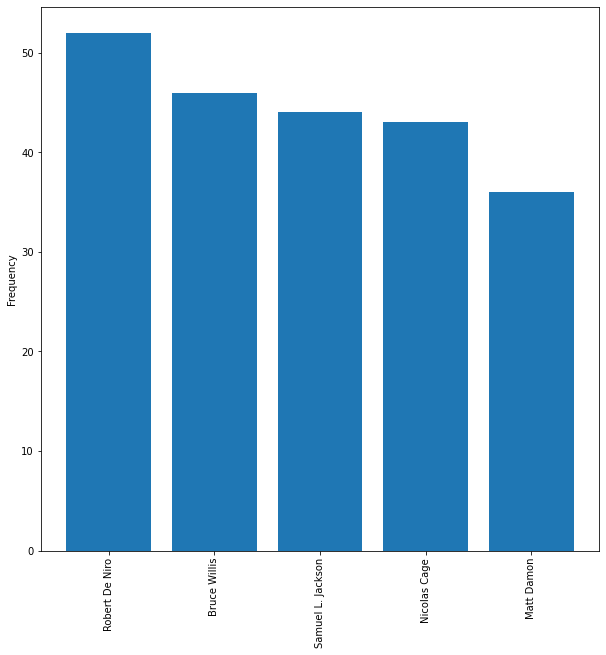

In [35]:
#now we print the top number of actors we want to see
def displayActors(x):
    x_axis =[]
    y_axis = []
    for i in range(x):
        print('the actors in the number {} spot for the most participations is {} with a total of {} participations'.format(i+1,actors[i][0], actors[i][1]))
        x_axis.append(actors[i][0])
        y_axis.append(actors[i][1])
    plt.bar(x_axis,y_axis)
    plt.xticks(rotation = 90)
    plt.ylabel('Frequency')
    fig = plt.gcf()
    fig.set_size_inches(10,10)
displayActors(5)

In [36]:
#we can see here that Robert De Niro had participated in the most amount of movies with 52 participations

### Research Question 4 (which director made the most movies?)

In [37]:
#first we get how many movies each director directed 
df_directors = pd.DataFrame(df['director'].value_counts())

the number 1 director is Steven Spielberg with 27 movies
the number 2 director is Clint Eastwood with 24 movies
the number 3 director is Ridley Scott with 21 movies
the number 4 director is Woody Allen with 18 movies
the number 5 director is Steven Soderbergh with 17 movies


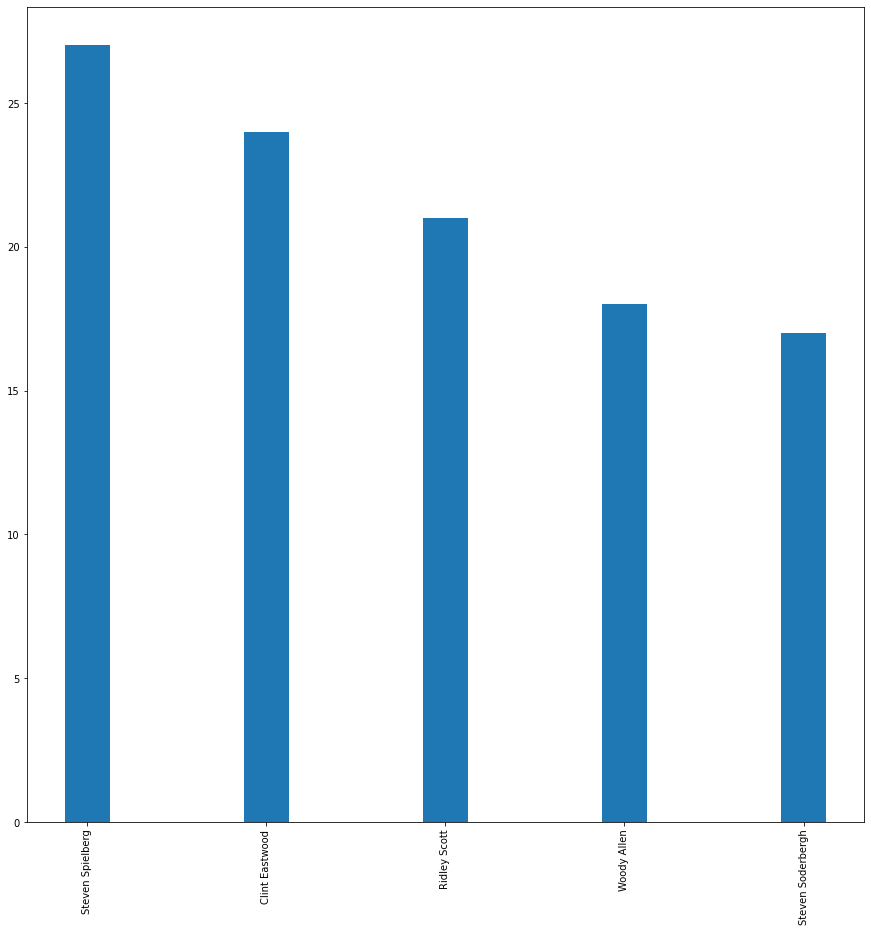

In [38]:
#then we diplay the data
def displayDirectors(x):
    for i in range(x):
        print("the number {} director is {} with {} movies".format(i+1,df_directors.index[i], df_directors['director'][i]))
    plt.bar(df_directors.index[:x],df_directors['director'][:x], width = 0.25)
    plt.xticks(rotation = 90)
    fig = plt.gcf()
    fig.set_size_inches(15,15)
    plt.show()
displayDirectors(5)

### Research Question 5  (What is the average runtime of movies?)

In [39]:
#here we need to calculate the mean of the (runtime) colums
avgRunTime = df['runtime'].mean()
print("The average runtime for all the movies is: {} minutes".format(avgRunTime))

The average runtime for all the movies is: 109.35111695137977 minutes


### Research Question 6  (Analysis of the runtime?!)

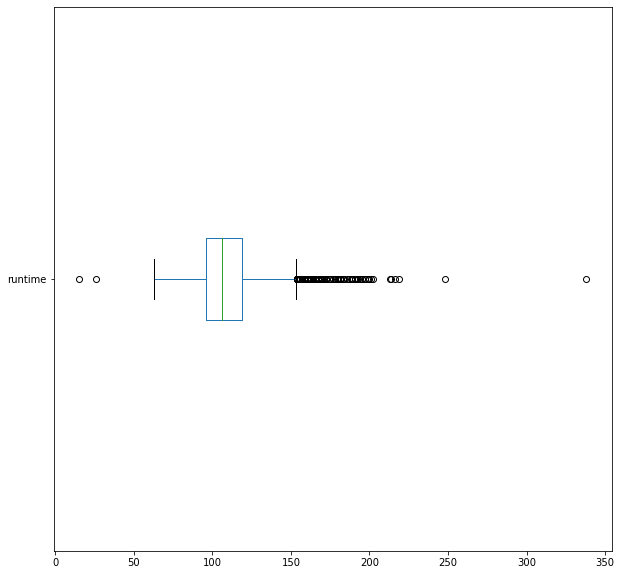

In [40]:
#here we want to know more about the runtime column
#first we make a boxplot for this column
df.boxplot('runtime',grid = False, vert = False)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [41]:
df['runtime'].describe()

count    3805.000000
mean      109.351117
std        19.845678
min        15.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

In [42]:
#from the data that we got using the describe function and  the boxplot we can conclude the following:
#1) the average of runtime is 109.351117 min as we got in question 5
#2) 25% of the movies have a runtime of 96 minutes or less
#3) 25% of the movies have a runtime of 119 minutes or more \\ 75% of the movies have runtime less that 119 minutes

### Research Question 7  (what are the most frequent genres?)

In [43]:
#first we need the count for each genre
genres = {}
for i in range(len(df)):
    genre = df['genres'][i]
    for j in genre.split('|'):
        if j in genres.keys():
            genres[j] = genres[j] + 1 
        else:
            genres[j] = 1

In [44]:
#second we sort the genres in a descending fashion
genres = sorted(genres.items(), key=lambda x: x[1], reverse=True)

the number 1 genre is Drama with a 1729 repetition numbers
the number 2 genre is Comedy with a 1335 repetition numbers
the number 3 genre is Thriller with a 1194 repetition numbers
the number 4 genre is Action with a 1076 repetition numbers
the number 5 genre is Adventure with a 743 repetition numbers


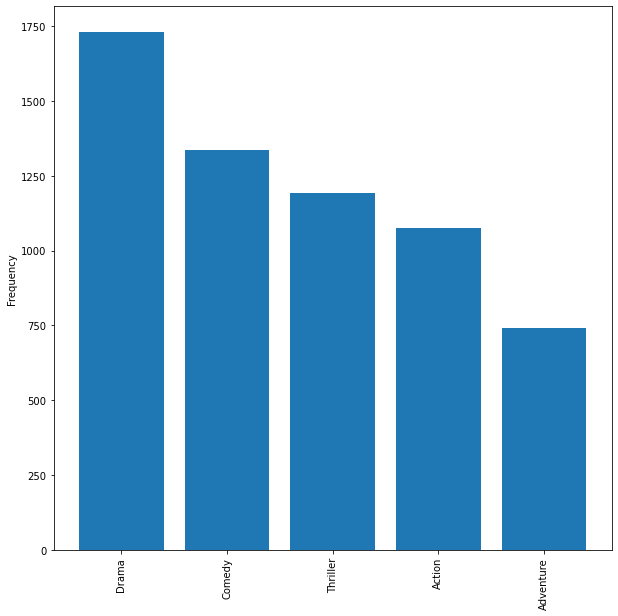

In [45]:
#displaying the results
def displayGenres(x):
    x_axis = []
    y_axis = []
    for i in range(x):
        print("the number {} genre is {} with a {} repetition numbers".format(i+1,genres[i][0], genres[i][1]))
        x_axis.append(genres[i][0])
        y_axis.append(genres[i][1])
    plt.bar(x_axis,y_axis)
    plt.xticks(rotation = 90)
    plt.ylabel('Frequency')
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    plt.show()
displayGenres(5)

In [46]:
#we can see from the data that the number one genre is Drama followed by comedy and thriller

### Research Question 8  (What are most active production companies?) 

In [47]:
#first we need the count for each production company
production_companies = {}
for i in range(len(df)):
    company = df['production_companies'][i]
    for j in company.split('|'):
        if j in production_companies.keys():
            production_companies[j] = production_companies[j] + 1 
        else:
            production_companies[j] = 1

In [48]:
#second we sort the companies in a descending fashion
production_companies = sorted(production_companies.items(), key=lambda x: x[1], reverse=True)

the number 1 prodcution company is Universal Pictures with 329 movies
the number 2 prodcution company is Warner Bros. with 324 movies
the number 3 prodcution company is Paramount Pictures with 270 movies
the number 4 prodcution company is Twentieth Century Fox Film Corporation with 201 movies
the number 5 prodcution company is Columbia Pictures with 178 movies


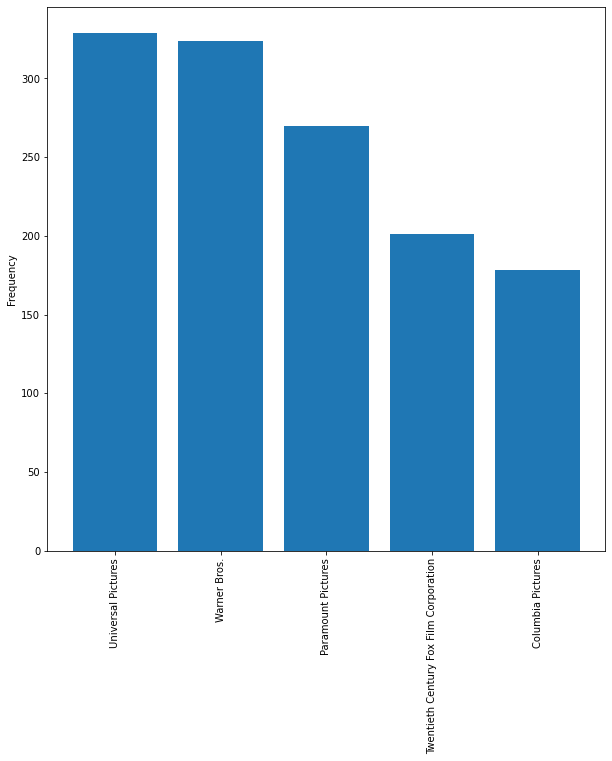

In [49]:
#displaying the results
def displayCompanies(x):
    x_axis = []
    y_axis = []
    for i in range(x):
        print("the number {} prodcution company is {} with {} movies".format(i+1,production_companies[i][0], production_companies[i][1]))
        x_axis.append(production_companies[i][0])
        y_axis.append(production_companies[i][1])
    plt.bar(x_axis,y_axis)
    plt.xticks(rotation = 90)
    plt.ylabel('Frequency')
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    plt.show()
displayCompanies(5)

In [50]:
#we can see that universal picture is the most active production company with 329 movies, followed by Warner Bros wit 324 movies

### Research Question 9 (what is the year with the most number of movies?)

2011    196
2013    179
2010    177
2009    170
2006    168
Name: release_year, dtype: int64


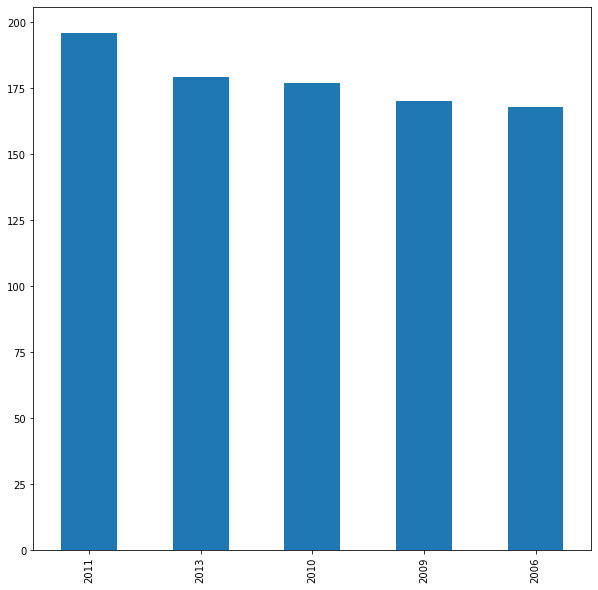

In [51]:
#we need to see how many movies were produced each year and plot the data
def displayMoviesPerYear(x):
    print(df['release_year'].value_counts().head(x))
    df['release_year'].value_counts().head(x).plot(kind = 'bar')
    fig = plt.gcf()
    fig.set_size_inches(10,10)
displayMoviesPerYear(5)

In [52]:
#from the data shown is the above graph, we can see that 2011 was the year with the most number of movies

### Research Question 10 (How many companies made profit? and how many companies lost?)

In [53]:
#seing the number of companies that made profit(>0)
print('there were ',df[df['profit']>0].count()[0], ' movies that made profits')

there were  2756  movies that made profits


In [54]:
print('there were ',df[df['profit']<0].count()[0], ' movies that made losses')

there were  1046  movies that made losses


In [55]:
print('there were ',df[df['profit']==0].count()[0], ' movies that neither made profits nor losses')

there were  3  movies that neither made profits nor losses


### Research Question 11 (number of movies vs year)

In [56]:
#we first get the total number of movies each year
moviesVsYear = df.groupby('release_year')['original_title'].count()

<function matplotlib.pyplot.show(close=None, block=None)>

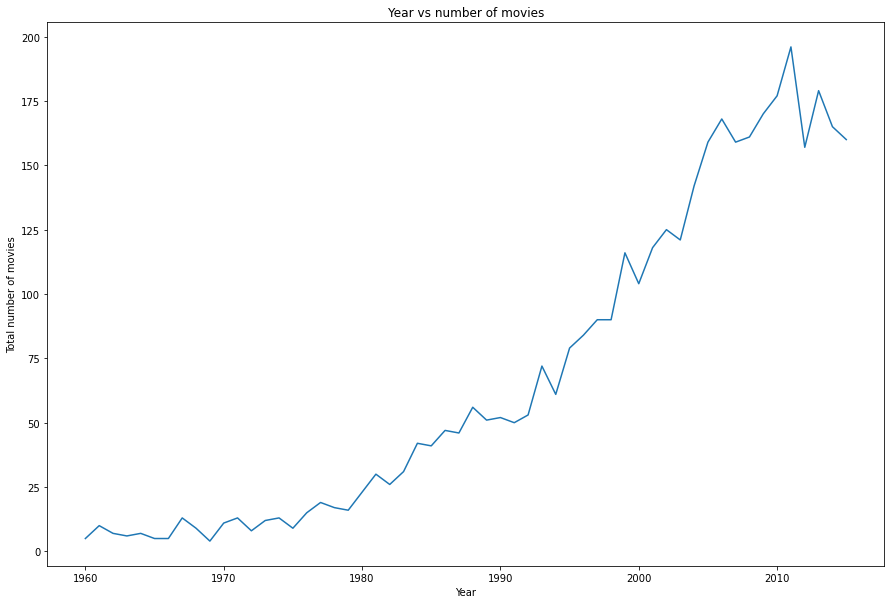

In [57]:
#then we plot
plt.plot(moviesVsYear)
plt.title("Year vs number of movies")
plt.xlabel('Year')
plt.ylabel('Total number of movies')
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show

In [58]:
#we can see from the graph above that the movie industry is rapidly growing and more movies are produced each ear 

### Research Question 12  (Year vs Profit) 

In [59]:
#we first get the total profit for each year
profitVsYear = df.groupby('release_year')['profit'].sum()

<function matplotlib.pyplot.show(close=None, block=None)>

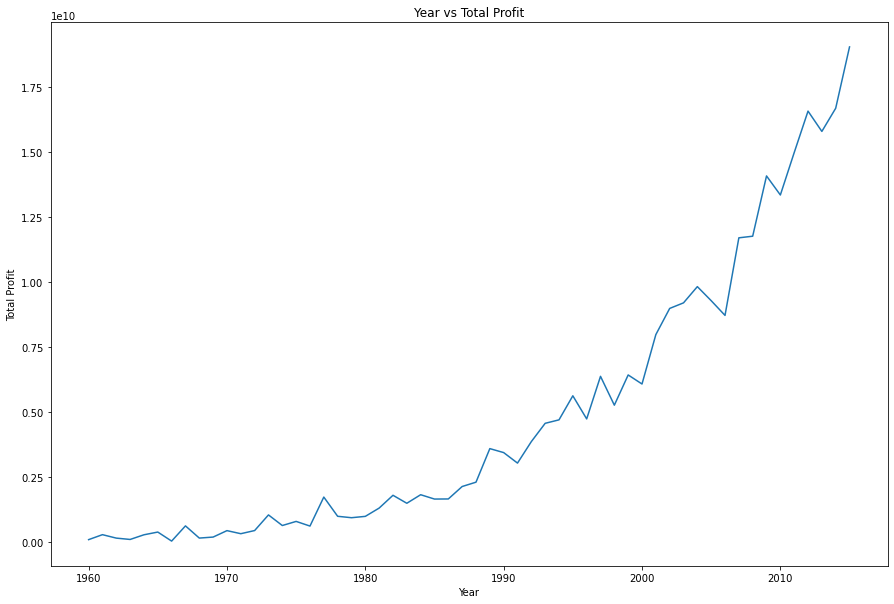

In [60]:
#then we plot
plt.plot(profitVsYear)
plt.title("Year vs Total Profit")
plt.xlabel('Year')
plt.ylabel('Total Profit')
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.show

In [61]:
#we can see from the graph that the profit in the movies industry tends to rapidly grow each year 

### Research Question 13  (Which companies are the most profitable ?) 

In [62]:
#in this part, I am assuming that the profit for each movie is divided equally amongst the production companies
#first we need to get the profit for each company

In [63]:
companies = {}
for i in range(len(df)):
    comp = df['production_companies'][i].split('|')
    profit = df['profit'][i] / len(comp)
    for j in comp:
        if j in companies.keys():
            companies[j] = companies[j] + profit
        else:
            companies[j] = profit

In [64]:
#then we sort the companies
companies = sorted(companies.items(), key=lambda x: x[1], reverse=True)

In [65]:
#plotting the data
x_axis = []
y_axis = []
for i in range(len(companies)):
    x_axis.append(companies[i][0])
    y_axis.append(companies[i][1])

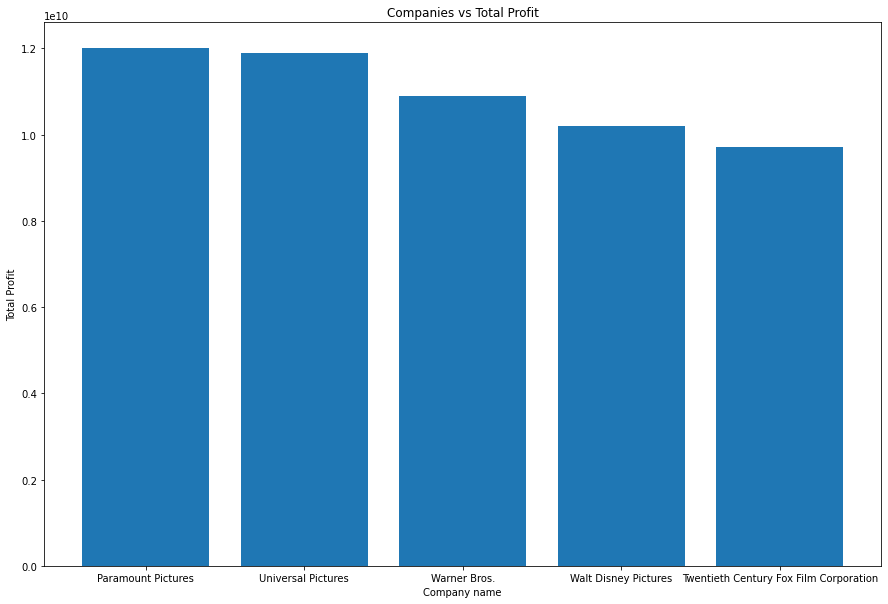

In [66]:
def displayProfitableCompanies(x):
    plt.bar(x_axis[:x],y_axis[:x])
    plt.title("Companies vs Total Profit")
    plt.xlabel('Company name')
    plt.ylabel('Total Profit')
    fig = plt.gcf()
    fig.set_size_inches(15,10)
    plt.show()
displayProfitableCompanies(5)

In [67]:
#we can see from the data above that Paramount picture is the most profitable company followed by Universal Pictures and 
#Warner Bros

### Research Question 14  (Which director generated the most profits?) 

In [68]:
directorProfit = df.groupby('director')['profit'].sum()
directorProfitSorted = directorProfit.sort_values(ascending = False)

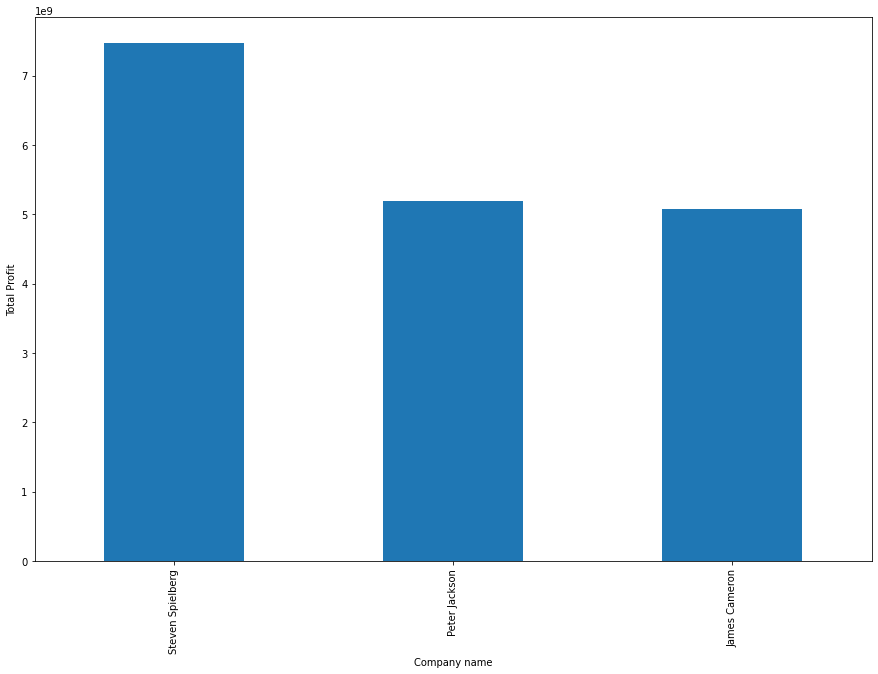

In [69]:
def displayDirectorProfit(x):    
    directorProfitSorted[:x].plot(kind='bar')
    plt.xlabel('Company name')
    plt.ylabel('Total Profit')
    fig = plt.gcf()
    fig.set_size_inches(15,10)
    plt.show()
displayDirectorProfit(3)

In [70]:
#from the data above, we can tell the Steven Spielberg had produced the most profits followed by Peter Jackson and James Cameron

In [71]:
#for the upcoming parts, lets consider a $100 million dollars minimum profit for a movie to be successful 
#lets call these movies the "Actually successful movies"

### Research Question 15  (How many movies are actually successful?) 

In [72]:
df1 = df[df['profit'] >= 100000000]

In [73]:
df1 = df1.reset_index(drop = True)
df1.head()

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,profit
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1.363529e+09
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015,2.284364e+08
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015,1.852382e+08
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015,1.868178e+09
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015,1.316249e+09


In [74]:
print("there are ",len(df1)," movies that are actually successful")

there are  826  movies that are actually successful


### Research Question 16  (Which actors participated the most in actually successful movies?) 

In [75]:
#first we get the count for the actors of the sucessful movies 
actors2 = {}
for i in range(len(df1)):
    cast_members = df1['cast'][i]
    for j in cast_members.split('|'):
        if j in actors2.keys():
            actors2[j] = actors2[j] + 1 
        else:
            actors2[j] = 1

In [76]:
actors2 = sorted(actors2.items(), key=lambda x: x[1], reverse=True)

the actors in the number 1 spot for the most participations in actually successful movies is Tom Cruise with a total of 23 participations
the actors in the number 2 spot for the most participations in actually successful movies is Tom Hanks with a total of 19 participations
the actors in the number 3 spot for the most participations in actually successful movies is Brad Pitt with a total of 18 participations
the actors in the number 4 spot for the most participations in actually successful movies is Adam Sandler with a total of 17 participations
the actors in the number 5 spot for the most participations in actually successful movies is Will Smith with a total of 16 participations


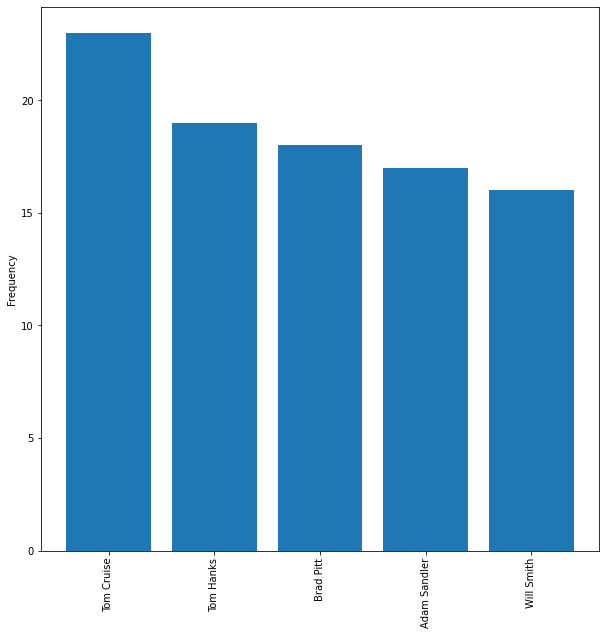

In [77]:
#now we print the top number of actors we want to see
def displayActors2(x):
    x_axis =[]
    y_axis = []
    for i in range(x):
        print('the actors in the number {} spot for the most participations in actually successful movies is {} with a total of {} participations'.format(i+1,actors2[i][0], actors2[i][1]))
        x_axis.append(actors2[i][0])
        y_axis.append(actors2[i][1])
    plt.bar(x_axis,y_axis)
    plt.xticks(rotation = 90)
    plt.ylabel('Frequency')
    fig = plt.gcf()
    fig.set_size_inches(10,10)
displayActors2(5)

In [78]:
#from the data above, we can see that Tom Cruis has participated the most in actally successful movies followed by Tom Hanks
#and Brad Pitt

### Research Question 17  (Which directors participated the most in actually successful movies?) 

In [79]:
#first we get how many movies each director directed 
df_directors2 = pd.DataFrame(df1['director'].value_counts())

the number 1 director is Steven Spielberg with 22 movies of the actually successful movies
the number 2 director is Robert Zemeckis with 10 movies of the actually successful movies
the number 3 director is Michael Bay with 8 movies of the actually successful movies
the number 4 director is Chris Columbus with 7 movies of the actually successful movies
the number 5 director is M. Night Shyamalan with 7 movies of the actually successful movies


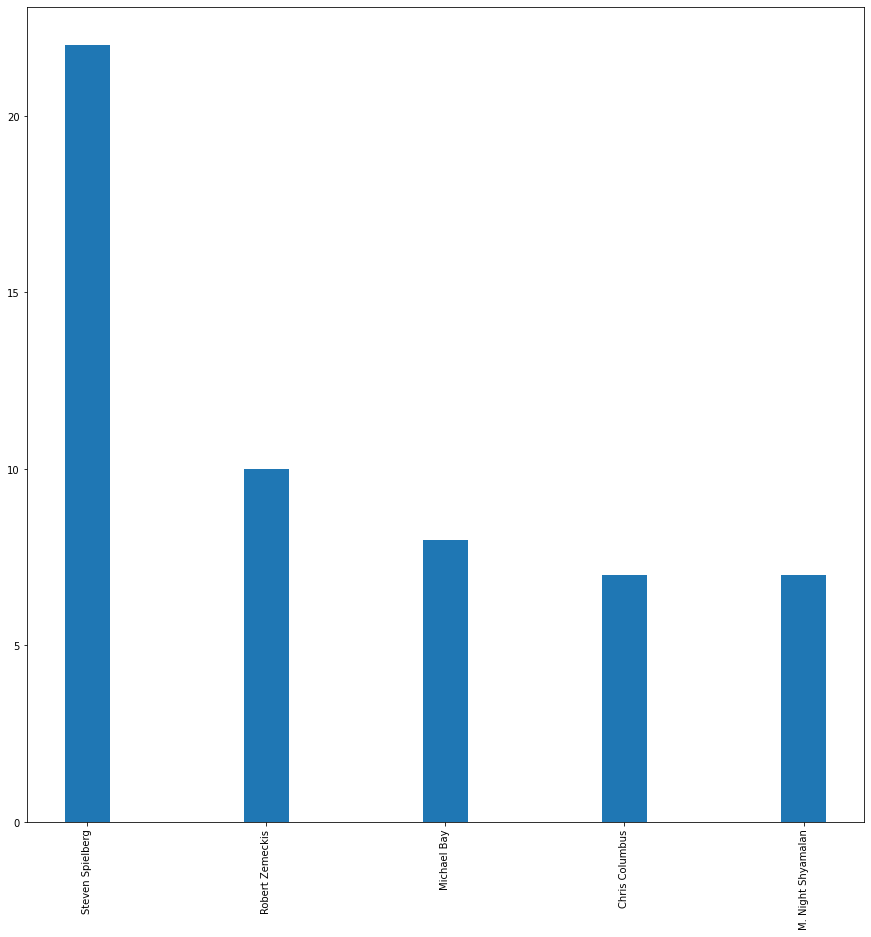

In [80]:
#then we diplay the data
def displayDirectors2(x):
    for i in range(x):
        print("the number {} director is {} with {} movies of the actually successful movies".format(i+1,df_directors2.index[i], df_directors2['director'][i]))
    plt.bar(df_directors2.index[:x],df_directors2['director'][:x], width = 0.25)
    plt.xticks(rotation = 90)
    fig = plt.gcf()
    fig.set_size_inches(15,15)
    plt.show()
displayDirectors2(5)

In [81]:
# from the data above we can see that Steven Spielberg is the directors with most movies that are actually successful
#followed by Robert Zemeckis and Michael Bay

### Research Question 18  (Which genre is the most common amongst the actually successful movies?) 

In [82]:
#first we need the count for each genre
genres2 = {}
for i in range(len(df1)):
    genre = df1['genres'][i]
    for j in genre.split('|'):
        if j in genres2.keys():
            genres2[j] = genres2[j] + 1 
        else:
            genres2[j] = 1

In [83]:
#second we sort the genres in a descending fashion
genres2 = sorted(genres2.items(), key=lambda x: x[1], reverse=True)

the number 1 genre is Action with a 317 movies in the actually successful movies
the number 2 genre is Comedy with a 299 movies in the actually successful movies
the number 3 genre is Adventure with a 278 movies in the actually successful movies
the number 4 genre is Drama with a 264 movies in the actually successful movies
the number 5 genre is Thriller with a 233 movies in the actually successful movies


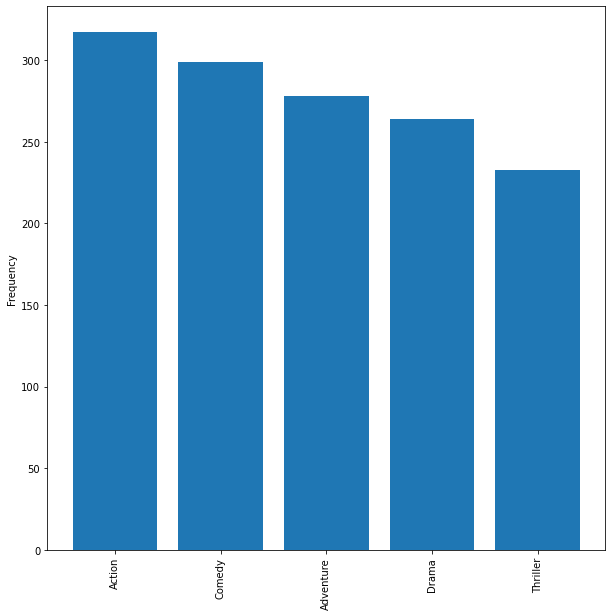

In [84]:
#displaying the results
def displayGenres2(x):
    x_axis = []
    y_axis = []
    for i in range(x):
        print("the number {} genre is {} with a {} movies in the actually successful movies".format(i+1,genres2[i][0], genres2[i][1]))
        x_axis.append(genres2[i][0])
        y_axis.append(genres2[i][1])
    plt.bar(x_axis,y_axis)
    plt.xticks(rotation = 90)
    plt.ylabel('Frequency')
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    plt.show()
displayGenres2(5)

In [85]:
#we can see here that Action is the most common genra in the actually successful movies followed by Comedy then Adventure

### Research Question 19  (Which production company produced most of the actually successful movies?)  

In [86]:
#first we need the count for each production company
production_companies2 = {}
for i in range(len(df1)):
    company = df1['production_companies'][i]
    for j in company.split('|'):
        if j in production_companies2.keys():
            production_companies2[j] = production_companies2[j] + 1 
        else:
            production_companies2[j] = 1

In [87]:
#second we sort the companies in a descending fashion
production_companies2 = sorted(production_companies2.items(), key=lambda x: x[1], reverse=True)

the number 1 prodcution company is Warner Bros. with 102 movies of the acutally successful movies
the number 2 prodcution company is Universal Pictures with 99 movies of the acutally successful movies
the number 3 prodcution company is Paramount Pictures with 87 movies of the acutally successful movies
the number 4 prodcution company is Twentieth Century Fox Film Corporation with 82 movies of the acutally successful movies
the number 5 prodcution company is Walt Disney Pictures with 58 movies of the acutally successful movies


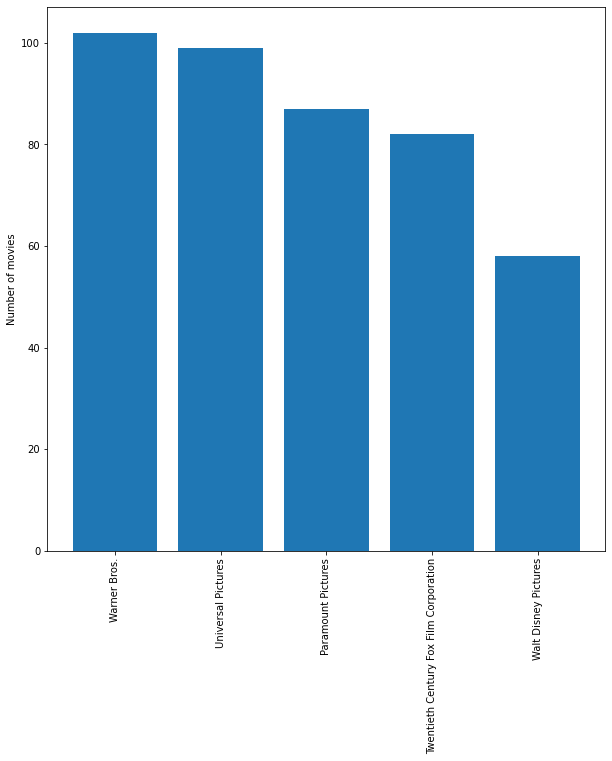

In [88]:
#displaying the results
def displayCompanies2(x):
    x_axis = []
    y_axis = []
    for i in range(x):
        print("the number {} prodcution company is {} with {} movies of the acutally successful movies".format(i+1,production_companies2[i][0], production_companies2[i][1]))
        x_axis.append(production_companies2[i][0])
        y_axis.append(production_companies2[i][1])
    plt.bar(x_axis,y_axis)
    plt.xticks(rotation = 90)
    plt.ylabel('Number of movies')
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    plt.show()
displayCompanies2(5)

In [89]:
#we can see that in the acutally successful movies, Warner bros produces the most movies followed by Universal Pictures and
#Paramount Pictures

### Research Question 20 (what is the average budget, revenue, and profit for the actually sucessful movies?)

In [90]:
print("Average budget in the actually successful movies is: $",df1['budget'].mean())

Average budget in the actually successful movies is: $ 74469572.77602905


In [91]:
print("Average revenue in the actually successful movies is: $",df1['revenue'].mean())

Average revenue in the actually successful movies is: $ 345328046.81961256


In [92]:
print("Average profit in the actually successful movies is: $",df1['profit'].mean())

Average profit in the actually successful movies is: $ 270858474.0435835


<a id='conclusions'></a>
## Conclusions

In [93]:
"""
In this project, we investigated the tmdb movies dataset answering 19 that were asked:
first we cleaned the data by removing all the null values and dropping the duplicate rows, then we continues out
exploring the data, generating graphs, and coming up with an answer for each question that we asked and got the following:
1) the movie avatar was the most profitable, and the movie "The Warrior's Way" had the most losses. 
2)Average budget for a movie is $37607996.56, average revenue is $108973392, and the average profit is $71365395.43
3)Robert De Niro participated in the highest number of movies with a total of 52 movies
4)Steven Spielberg directed the most movies with a total of 27 movies
5)on average, a movie is 109.35 minutes long 
6) 25% of the movies are less than 96 minutes long
7) 75% of the movies are less than 119 minutes long
8) Drama is the most frequent genre
9) Universal Pictures participated the most in producing movies  with 329 movies
10) the highest number of movies produced in one year was 196 and it was in 2011
11) There were 2756 movies that made profits, 1046 movies that made losses, and 3 movies that broke even (maybe were null values and were not cleaned)
12)there are more movies produced each year
13) profits are growing each year in the movies industry
14) Paramount Pictures is the most profitable company (under the assumption that the profit from each movie is equally divided amoungst all the production companies)
15)Steven Spielberg is the director with the most profits
16) there are 826 actually successful movies (considering that a movie is actually successful when it generates more than $100 million in profit)
19) Tom Cruis is the highest participant in actually sucessful movies with 23 movies
20) Steven Spielberg has directed the most when it comes to actually successful movies with 22 movies
21) Action is the most common genre in the actually successful movies, it's the genre of 317 movies
22) Warner Bros has participated the most in producing actually successful movies with 102 movies
23) the average budget for a movie in an actually successful movie is $74469572.77, the average revenue $345328046.82
    ,and the average profit is $270858474.04

to sum up, in order to increase your odds of producing a successful movies, you need to do the following:
1) get Warner Bros to produce the movie 
2) get Tom Cruis to be in the cast of the movie
3) get steven Spielberg to direct the movie 
4) the genre of the movie should be Action

"""

'\nIn this project, we investigated the tmdb movies dataset answering 19 that were asked:\nfirst we cleaned the data by removing all the null values and dropping the duplicate rows, then we continues out\nexploring the data, generating graphs, and coming up with an answer for each question that we asked and got the following:\n1) the movie avatar was the most profitable, and the movie "The Warrior\'s Way" had the most losses. \n2)Average budget for a movie is $37607996.56, average revenue is $108973392, and the average profit is $71365395.43\n3)Robert De Niro participated in the highest number of movies with a total of 52 movies\n4)Steven Spielberg directed the most movies with a total of 27 movies\n5)on average, a movie is 109.35 minutes long \n6) 25% of the movies are less than 96 minutes long\n7) 75% of the movies are less than 119 minutes long\n8) Drama is the most frequent genre\n9) Universal Pictures participated the most in producing movies  with 329 movies\n10) the highest numb

In [ ]:
#sites used
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
#https://matplotlib.org/